<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/main/%EC%9D%B4%EC%A0%81%EB%A3%8C_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: right"> <b>201984044 ICT공학부 김희성</b></div>
<div style="text-align: right"> <b>201904073 소프트웨어전공 윤선미</b></div>

In [ ]:
#한글 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,424 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122531 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
plt.rc('font', family='NanumBarunGothic') # 한글 폰트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#파일 불러오기
train= pd.read_csv('/content/drive/MyDrive/FIFA_train.csv')
test= pd.read_csv('/content/drive/MyDrive/FIFA_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')

In [ ]:
train.head()


#FIFA 데이터 셋에 대한 정보확인

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
# 보기 편하게 한글로 변환
train.rename(columns={'age': '나이', 'stat_overall' : '선수의 현재 능력치' ,'stat_potential' : '선수의 발전 가능성', 'value' : '이적료', 
                      'continent' : '선수의 국적', 'contract_until' : '선수의 계약 기간', 'position' : '선수의 포지션',
                      'prefer_foot' : '선수의 주 발', 'reputation' : '선수의 유명도', 'stat_skill_moves' : '선수의 개인 능력'}, inplace=True)

In [ ]:
train.head()

,id,name,나이,선수의 국적,선수의 계약 기간,선수의 포지션,선수의 주 발,선수의 유명도,선수의 현재 능력치,선수의 발전 가능성,선수의 개인 능력,이적료
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
train.isnull().sum()
#결측치 확인

id            0
name          0
나이            0
선수의 국적        0
선수의 계약 기간     0
선수의 포지션       0
선수의 주 발       0
선수의 유명도       0
선수의 현재 능력치    0
선수의 발전 가능성    0
선수의 개인 능력     0
이적료           0
dtype: int64

In [ ]:
train.describe()
# 각 컬럼의 속성 확인

,id,나이,선수의 유명도,선수의 현재 능력치,선수의 발전 가능성,선수의 개인 능력,이적료
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [ ]:
# 컬럼의 고유값 개수를 확인 
for col in train.columns:
  n_unique=len(train[col].unique())
  print(col,n_unique)

id 8932
name 8932
나이 25
선수의 국적 5
선수의 계약 기간 17
선수의 포지션 4
선수의 주 발 2
선수의 유명도 5
선수의 현재 능력치 46
선수의 발전 가능성 45
선수의 개인 능력 5
이적료 198


In [ ]:
train.info()
# 데이터 유형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8932 non-null   int64  
 1   name        8932 non-null   object 
 2   나이          8932 non-null   int64  
 3   선수의 국적      8932 non-null   object 
 4   선수의 계약 기간   8932 non-null   object 
 5   선수의 포지션     8932 non-null   object 
 6   선수의 주 발     8932 non-null   object 
 7   선수의 유명도     8932 non-null   float64
 8   선수의 현재 능력치  8932 non-null   int64  
 9   선수의 발전 가능성  8932 non-null   int64  
 10  선수의 개인 능력   8932 non-null   float64
 11  이적료         8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


['id', 'name', '나이', '선수의 국적', '선수의 계약 기간', '선수의 포지션', '선수의 주 발', '선수의 유명도', '선수의 현재 능력치', '선수의 발전 가능성', '선수의 개인 능력', '이적료']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 237 (\N{LATIN SMALL LETTER I WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 353 (\N{LATIN SMALL LETTER S WITH CARON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 263 (\N{LATIN SMALL LETTER C WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_

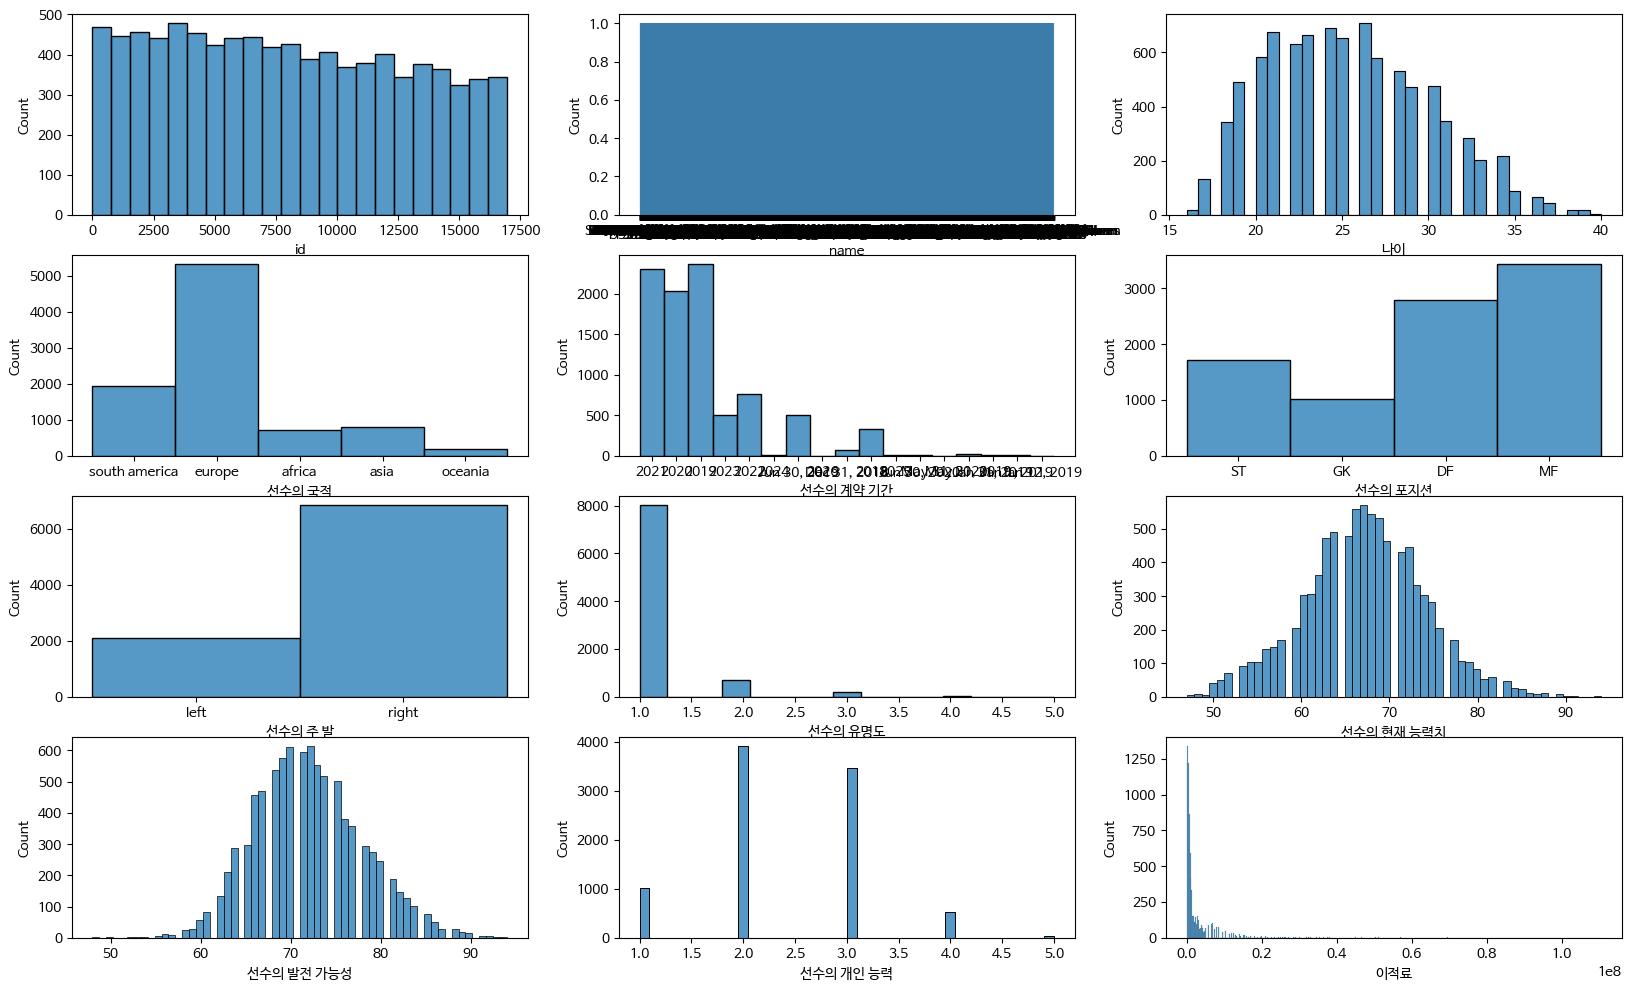

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(20,12))
axes = axes.flatten()
col_list = list(train.columns)
print(col_list)
for col, ax in zip(train.columns, axes):
  sns.histplot(data=train, x=col, ax=ax)
plt.show()

In [ ]:
# 데이터 정리
# 연속형 자료 [ age : 나이, stat_overall : 선수의 현재 능력치, stat_potential : 선수의 발전 가능성, value(이적료) : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) ]
# 범주/이산형 자료 [ continent : 선수들의 국적, contract_until : 선수의 계약 기간(전처리 필요해 보임), position : 선수의 포지션, prefer_foot : 선수의 주 발, reputation : 선수의 유명도, stat_skill_moves : 선수의 개인 능력 ]
# id : 선수 고유 아이디, name : 이름은 일단 제외

In [ ]:
 # 필요없는 데이터 삭제
 
train.drop(['id','name'],axis=1,inplace=True)

In [ ]:
nums = ['나이', '선수의 현재 능력치', '선수의 발전 가능성', '이적료']
noms = ['선수의 국적', '선수의 계약 기간', '선수의 포지션', '선수의 주 발','선수의 유명도', '선수의 개인 능력']


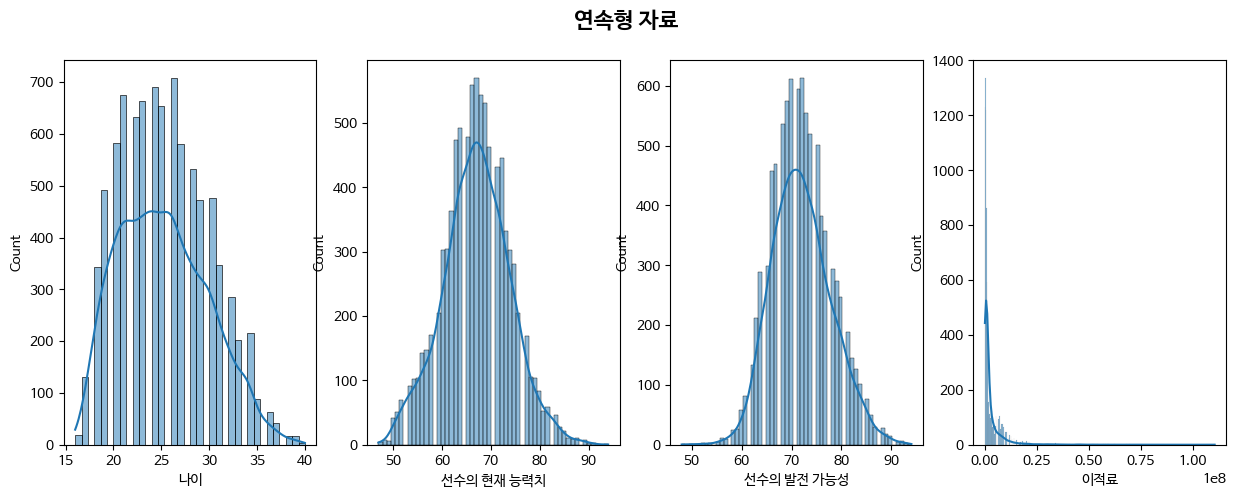

In [ ]:
# 연속형 자료 확인
fig, axes = plt.subplots(1,len(nums), figsize = (15,5))
axes = axes.flatten()
for col, axes in zip(nums, axes) :
  sns.histplot(data = train, x = col, ax = axes, kde=True)
plt.suptitle("연속형 자료", fontsize=16, fontweight='bold', ha='center')
plt.show()

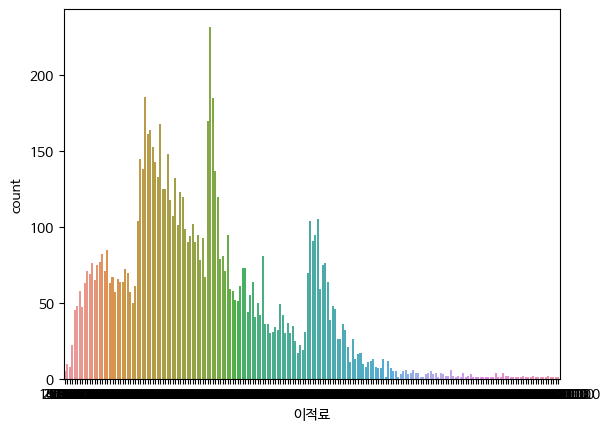

In [ ]:
# 이적료가 잘 안보여서 따로 뺏습니다.
sns.countplot(data = train, x ='이적료')
plt.show()

In [ ]:
# 결과

# 나이는 평균 25세이며 16살부터 40살 까지 있습니다.
# 선수들의 현재 능력치는 67가 평균이며 최소 47, 최대 94를 가지고 있습니다.
# 선수들의 발전 가능성은 72이 평균이며 최소 48, 최대 94까지 발전할 수 있습니다.
# 이적료는 평균 825,000 유로이며 최소 10,000 유로, 최대 110,500,500 유로입니다.

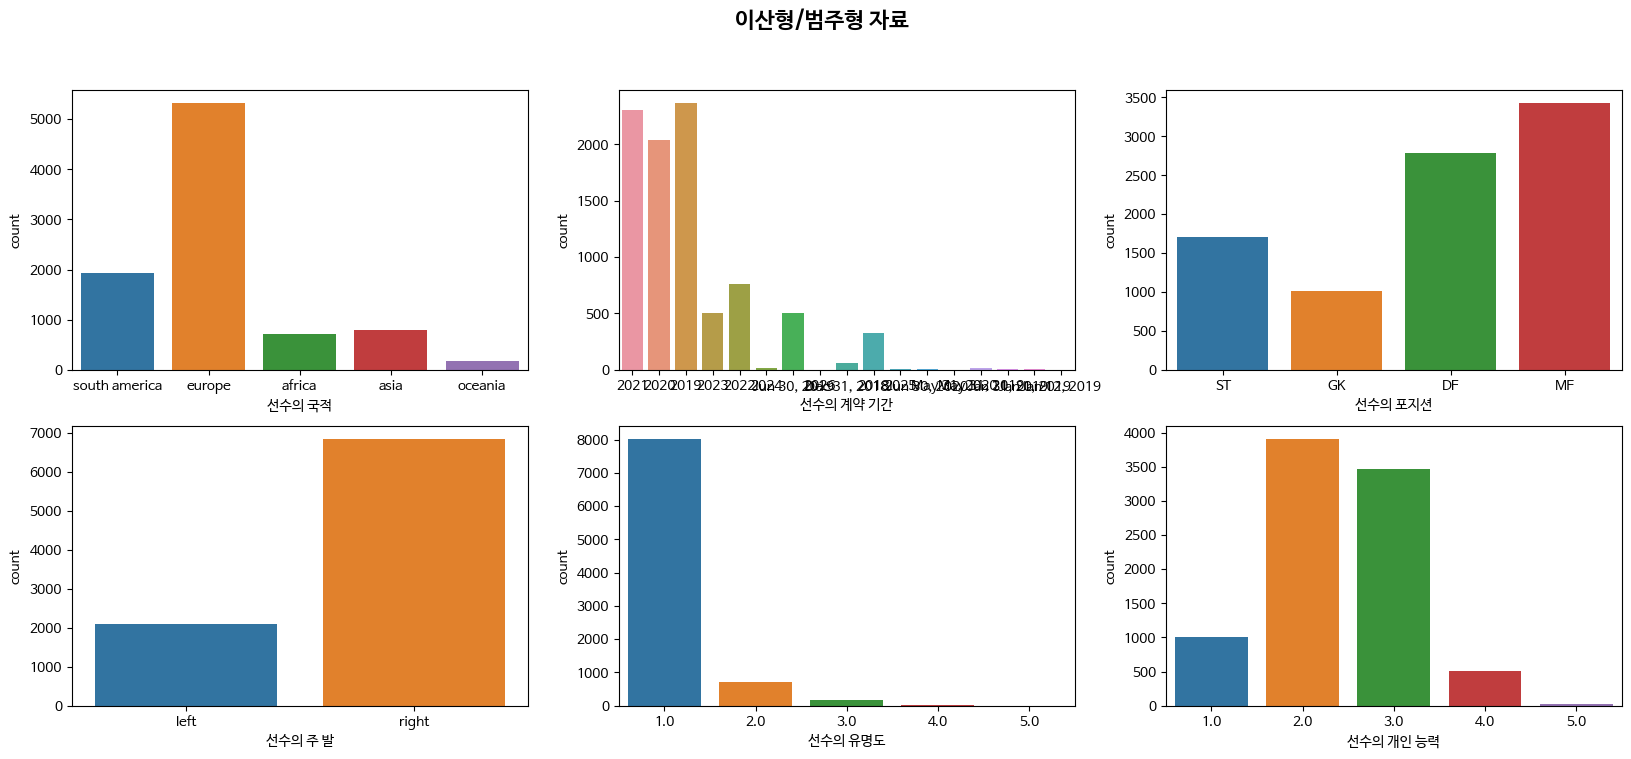

In [ ]:
# 이산형/범주형 자료 확인

fig, axes = plt.subplots(2, 3, figsize=(20,8))
axes = axes.flatten()
for col, axes in zip(noms, axes):
  sns.countplot(data=train, x=col, ax=axes)
  plt.suptitle("이산형/범주형 자료", fontsize=16, fontweight='bold', ha='center')
plt.show()

In [ ]:
# 결과

# 선수들의 국적은 유럽이 압도적으로 많으며 그 다음이 남아메리카가 많습니다.
# 선수들의 계약 만료는 2019,2020,2021년인 경우가 많습니다.
# 포지션은 골키퍼<공격수<수비수<미드필더 순입니다.
# 선수의 주 발은 왼발 보다 오른발이 3배 이상 많습니다.
# 선수의 유명도는 대부분 1입니다.
# 선수의 개인 능력은 2~3이 대부분입니다.

<ipython-input-34-3a8ddacd3dd1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True, vmax=1, vmin=-1)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 0.98, '상관관계')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


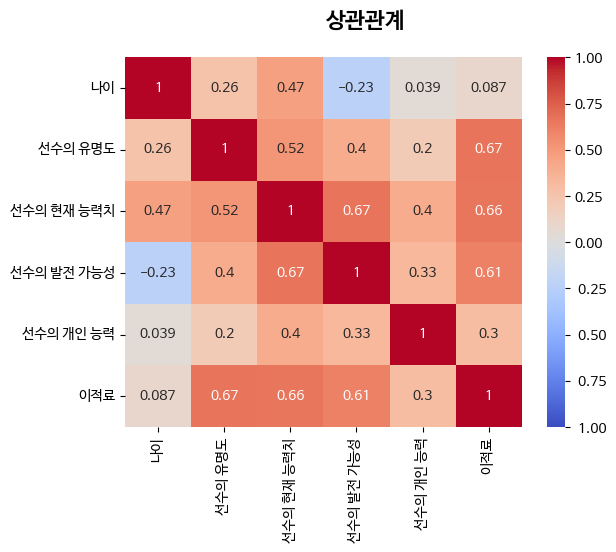

In [ ]:
# 상관관계

sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True, vmax=1, vmin=-1)
plt.suptitle("상관관계", fontsize=16, fontweight='bold', ha='center')

In [ ]:
train.corr().style.background_gradient(cmap='Blues')

<ipython-input-35-40b143420a53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient(cmap='Blues')


,나이,선수의 유명도,선수의 현재 능력치,선수의 발전 가능성,선수의 개인 능력,이적료
나이,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
선수의 유명도,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
선수의 현재 능력치,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
선수의 발전 가능성,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
선수의 개인 능력,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
이적료,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


In [ ]:
# 이적료는 선수의 유명도, 현재 능력치, 발전 가능성, 개인 능력, 나이 순으로 영향이 큽니다.
# 선수의 유명도는 선수의 현재 능력치, 발전 가능성, 개인 능력, 나이 순으로 영향이 큽니다.
# 선수의 현재 능력치는 발전 가능성, 나이, 개인 능력 순으로 영향이 큽니다.
# id는 현재 능력치와 음의 상관관계가 있음으로 능력치가 높을수록 id가 낮습니다.

In [ ]:
# 이제 나머지 이산형/범주형 자료도 비교합시다. 문자열은 상관계수 관계를 나타낼 수 없기 때문입니다.
# 그 전에 선수의 계약 기간에서 전처리가 필요한 부분을 하겠습니다.

# 전처리 하기
train['선수의 계약 기간'] = pd.to_datetime(train['선수의 계약 기간'], errors='coerce', infer_datetime_format=True)

# '선수의 계약 기간' 열을 변경
train['선수의 계약 기간'] = train['선수의 계약 기간'].dt.year

In [ ]:
# 전처리가 잘 되었는지 확인해보겠습니다.
for col in ['선수의 계약 기간']:
    print(col)
    print(train[col].value_counts())

선수의 계약 기간
2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: 선수의 계약 기간, dtype: int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   나이          8932 non-null   int64  
 1   선수의 국적      8932 non-null   object 
 2   선수의 계약 기간   8932 non-null   int64  
 3   선수의 포지션     8932 non-null   object 
 4   선수의 주 발     8932 non-null   object 
 5   선수의 유명도     8932 non-null   float64
 6   선수의 현재 능력치  8932 non-null   int64  
 7   선수의 발전 가능성  8932 non-null   int64  
 8   선수의 개인 능력   8932 non-null   float64
 9   이적료         8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB


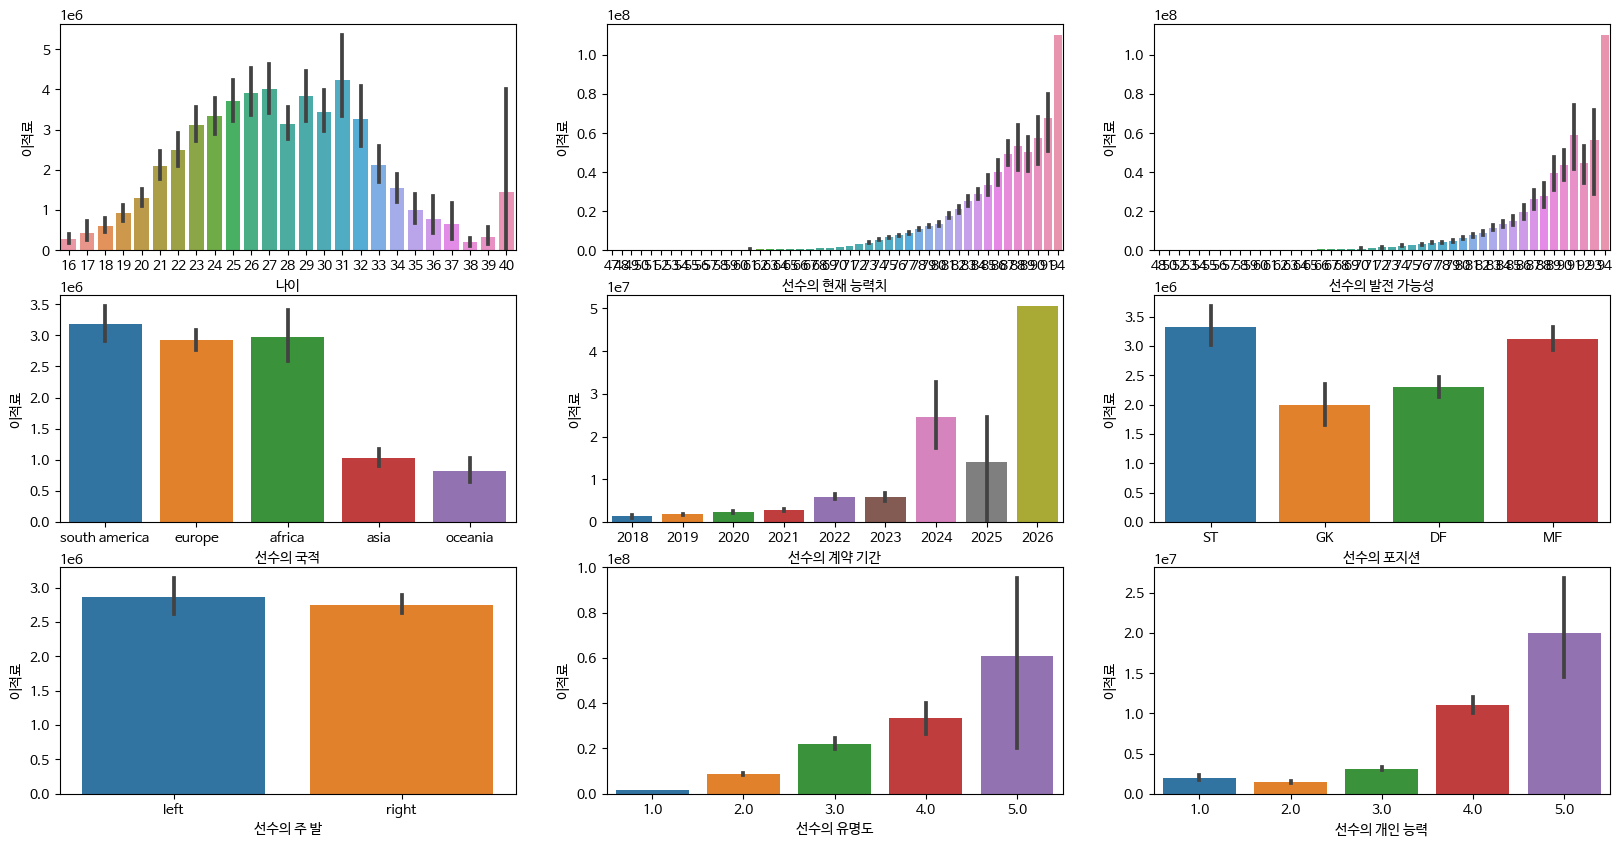

In [ ]:
# 남은 자료(선수들의 국적, 선수의 계약 기간, 선수의 포지션, 선수의 주 발)도 이적료와 어떤 관계가 있나 확인해보겠습니다.

fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()
y_column = '이적료'
nnums = ['나이', '선수의 현재 능력치', '선수의 발전 가능성']
x_noms = nnums + noms
for col, ax in zip(x_noms, axes):
    sns.barplot(data=train, x=col, y=y_column, ax=ax)
plt.show()

In [ ]:
train['선수의 국적']=train['선수의 국적'].astype('category').cat.codes
train['선수의 포지션'] = train['선수의 포지션'].astype('category').cat.codes
train['선수의 주 발'] = train['선수의 주 발'].astype('category').cat.codes

In [ ]:
train.corr().style.background_gradient(cmap='Blues')

,나이,선수의 국적,선수의 계약 기간,선수의 포지션,선수의 주 발,선수의 유명도,선수의 현재 능력치,선수의 발전 가능성,선수의 개인 능력,이적료
나이,1.000000,0.091028,-0.132052,-0.079128,0.007760,0.263468,0.467345,-0.231303,0.039362,0.087319
선수의 국적,0.091028,1.000000,0.040910,-0.020053,-0.019312,0.012608,0.099486,0.072312,0.012365,0.039554
선수의 계약 기간,-0.132052,0.040910,1.000000,0.020076,-0.004760,0.070446,0.156983,0.258477,0.082641,0.228638
선수의 포지션,-0.079128,-0.020053,0.020076,1.000000,0.105502,0.031215,0.015825,0.069233,0.384022,0.074980
선수의 주 발,0.007760,-0.019312,-0.004760,0.105502,1.000000,0.003859,-0.036585,-0.029030,-0.109107,-0.008204
선수의 유명도,0.263468,0.012608,0.070446,0.031215,0.003859,1.000000,0.521389,0.399183,0.196582,0.665982
선수의 현재 능력치,0.467345,0.099486,0.156983,0.015825,-0.036585,0.521389,1.000000,0.665453,0.400164,0.658444
선수의 발전 가능성,-0.231303,0.072312,0.258477,0.069233,-0.029030,0.399183,0.665453,1.000000,0.332578,0.611907
선수의 개인 능력,0.039362,0.012365,0.082641,0.384022,-0.109107,0.196582,0.400164,0.332578,1.000000,0.298500
이적료,0.087319,0.039554,0.228638,0.074980,-0.008204,0.665982,0.658444,0.611907,0.298500,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 0.98, '상관관계')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


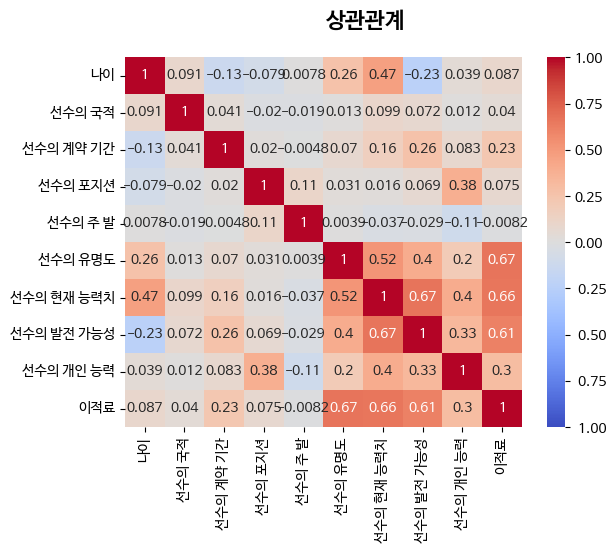

In [ ]:
sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True, vmax=1, vmin=-1)
plt.suptitle("상관관계", fontsize=16, fontweight='bold', ha='center')

In [ ]:
나이와, 국적, 포지션, 주 발은 이적료에 영향을 거의 미치지 않지만 계약 기간은 영향을 준다,